In [32]:
import os
normal_train, normal_test = ("/content/drive/My Drive/pytorch/train/normal"), ("/content/drive/My Drive/pytorch/test/normal")
pothole_train, pothole_test = ("/content/drive/My Drive/pytorch/train/potholes"), ("/content/drive/My Drive/pytorch/test/potholes")
train = "/content/drive/My Drive/pytorch/train/"
test = "/content/drive/My Drive/pytorch/test/"

In [26]:
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
from keras.models import Model
base_model = InceptionV3(weights='imagenet', include_top=False)
CLASSES = 2
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = tf.keras.layers.Dropout(0.4)(x)
predictions = tf.keras.layers.Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
for layer in base_model.layers:
    layer.trainable = False

In [28]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    test,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 649 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


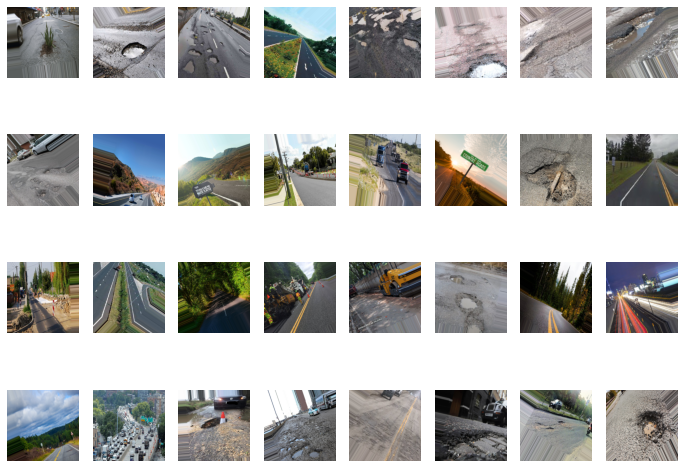

In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [38]:
EPOCHS = 5
BATCH_SIZE = 32
STEPS_PER_EPOCH = 2
VALIDATION_STEPS = 64

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/5
2/2 [==============================] - 19s 9s/step - loss: 0.2420 - accuracy: 0.8906 - val_loss: 0.1408 - val_accuracy: 0.9688
Epoch 2/5
2/2 [==============================] - 8s 4s/step - loss: 0.2326 - accuracy: 0.9219
Epoch 3/5
2/2 [==============================] - 8s 4s/step - loss: 0.2407 - accuracy: 0.9062
Epoch 4/5
2/2 [==============================] - 3s 2s/step - loss: 0.2163 - accuracy: 0.8780
Epoch 5/5
2/2 [==============================] - 7s 4s/step - loss: 0.2179 - accuracy: 0.9219
INFO:tensorflow:Assets written to: filename.model/assets


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [40]:
model = load_model(MODEL_FILE)

array([0.00646396, 0.9935361 ], dtype=float32)

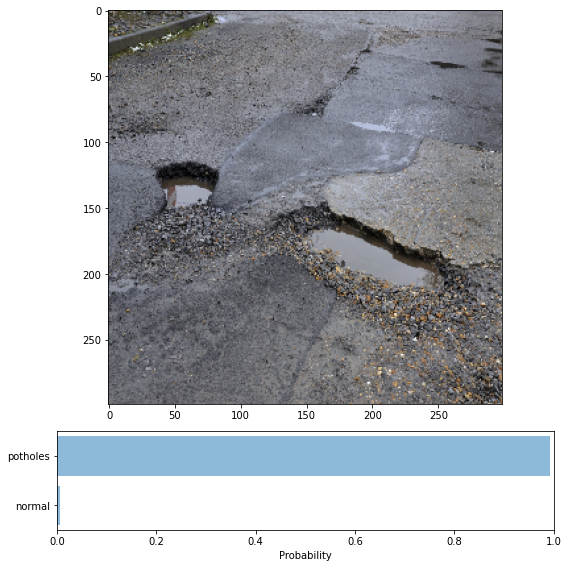

In [44]:
img = image.load_img('/content/drive/My Drive/pytorch/test/potholes/2.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)

plot_preds(np.asarray(img), preds)
preds

array([0.98657125, 0.01342874], dtype=float32)

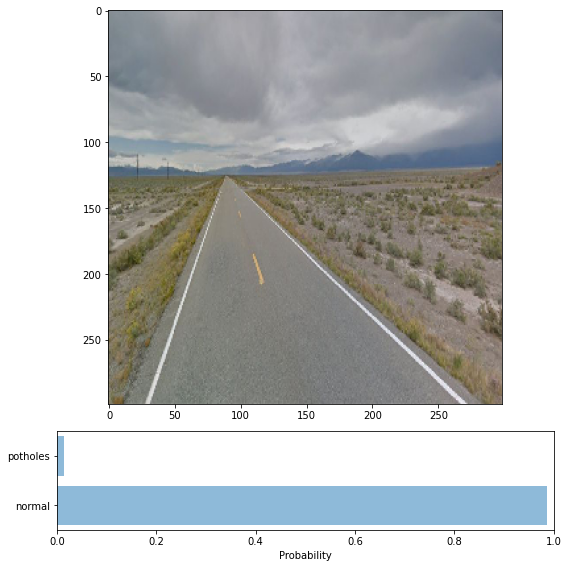

In [45]:
img = image.load_img('/content/drive/My Drive/pytorch/test/normal/2.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)

plot_preds(np.asarray(img), preds)
preds